<a href="https://colab.research.google.com/github/BKN1810/DeepLearning/blob/master/CatsDogsUsingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install the dependencies
!pip install kaggle 

In [2]:
from google.colab import files
files.upload() # load kaggle.json file from your computer

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"balnyaupane","key":"11702c85abe710eb647d8d7e22bc4d9a"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#Change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d balnyaupane/cats-dogs-224-by-224-images -p /content

 95% 185M/194M [00:04<00:00, 42.2MB/s]
100% 194M/194M [00:04<00:00, 47.9MB/s]


In [5]:
!unzip -uq "/content/cats-dogs-224-by-224-images.zip" -d "/content/Dataset"

In [6]:
from keras.models import Sequential
from keras.layers import Convolution2D, ZeroPadding2D ,BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout

In [7]:
#Initializing CNN
classifier = Sequential()

#Adding 1st Convolution Layer
classifier.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(1,1), input_shape=(224,224,1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2) ))
classifier.add(BatchNormalization())
#Adding  Dropout Layer to eliminate overfitting
classifier.add(Dropout(0.2))

#Adding 2nd Convolution Layer
classifier.add(Convolution2D(filters=64, kernel_size=(3,3), strides=(2,2), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#Adding 3rd Convolution Layer
classifier.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(2,2), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#Adding  Dropout Layer to eliminate overfitting
classifier.add(Dropout(0.2))

#Adding Flatten Layer to convert 2D matrix into an array
classifier.add(Flatten())

#Adding Fully connected layer
classifier.add(Dense(units=64,activation='relu'))

#Adding Fully connected layer
classifier.add(Dense(units=32,activation='relu'))

#Adding Fully connected layer
classifier.add(Dense(units=16,activation='relu'))

#Adding Output Layer
classifier.add(Dense(units=1,activation='sigmoid'))

print(classifier.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 111, 111, 32)      128       
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 55, 55, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        1

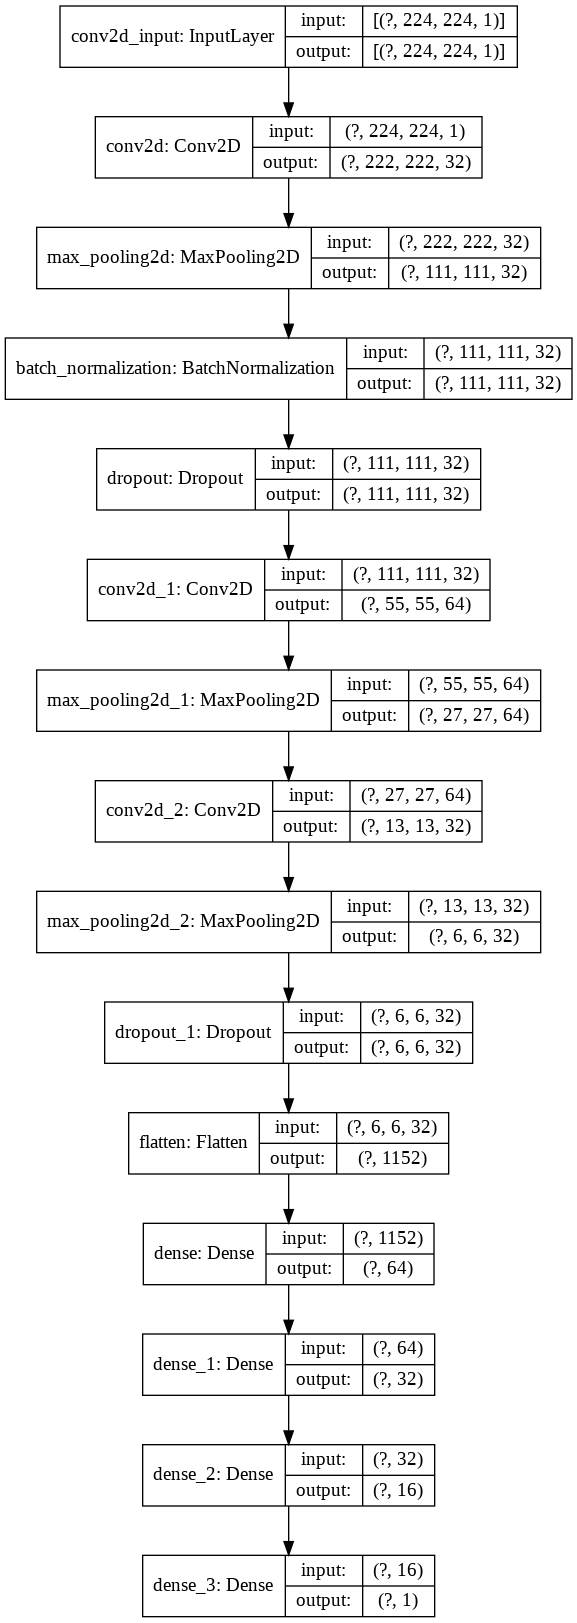

In [8]:
from keras.utils.vis_utils import plot_model
plot_model(classifier, to_file='cat_dog_model.png', show_shapes=True, show_layer_names=True)

In [9]:
#compiling the cnn
classifier.compile(optimizer='adam' , loss='binary_crossentropy',metrics=['accuracy'])

#part2- fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/Dataset/cats_dogs_dataset_224_by_224/training',
        target_size=(224,224),
        batch_size=32,
        color_mode='grayscale',
        class_mode='binary')

print("training_set.class_indices:   ",training_set.class_indices)

test_set = test_datagen.flow_from_directory('/content/Dataset/cats_dogs_dataset_224_by_224/test',
        target_size=(224,224),
        batch_size=32,
        color_mode='grayscale',
        class_mode='binary')

print("test_set.class_indices:   ",test_set.class_indices)

Found 8000 images belonging to 2 classes.
training_set.class_indices:    {'cats': 0, 'dogs': 1}
Found 2000 images belonging to 2 classes.
test_set.class_indices:    {'cats': 0, 'dogs': 1}


In [11]:
History=classifier.fit(training_set,
        steps_per_epoch=125,
        epochs=60,
        validation_data=test_set,
        validation_steps=32,
        verbose=1)

Epoch 1/60
125/125 [==============================] - 23s 187ms/step - loss: 0.6058 - accuracy: 0.6727 - val_loss: 0.6303 - val_accuracy: 0.6328
Epoch 2/60
125/125 [==============================] - 23s 185ms/step - loss: 0.5631 - accuracy: 0.7120 - val_loss: 0.5536 - val_accuracy: 0.7168
Epoch 3/60
125/125 [==============================] - 23s 182ms/step - loss: 0.5544 - accuracy: 0.7188 - val_loss: 0.5790 - val_accuracy: 0.6934
Epoch 4/60
125/125 [==============================] - 23s 182ms/step - loss: 0.5253 - accuracy: 0.7445 - val_loss: 0.4939 - val_accuracy: 0.7568
Epoch 5/60
125/125 [==============================] - 22s 178ms/step - loss: 0.5177 - accuracy: 0.7490 - val_loss: 0.5678 - val_accuracy: 0.7275
Epoch 6/60
125/125 [==============================] - 22s 178ms/step - loss: 0.5175 - accuracy: 0.7455 - val_loss: 0.5193 - val_accuracy: 0.7734
Epoch 7/60
125/125 [==============================] - 23s 181ms/step - loss: 0.4957 - accuracy: 0.7657 - val_loss: 0.5147 - val_ac

In [12]:
# list all data in history
print(History.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


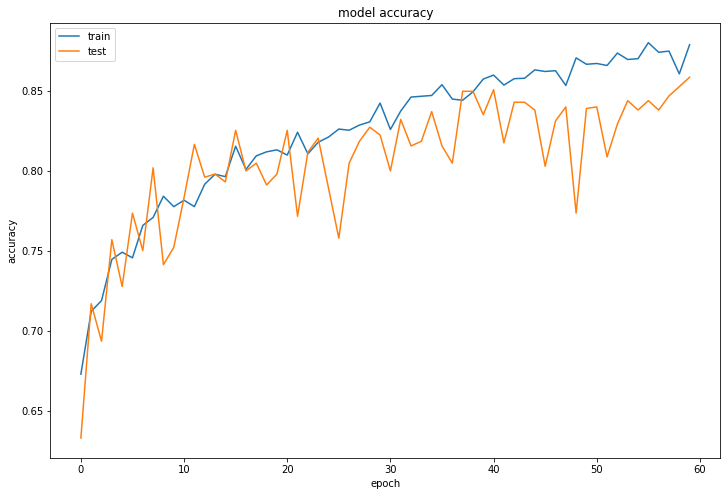

In [13]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

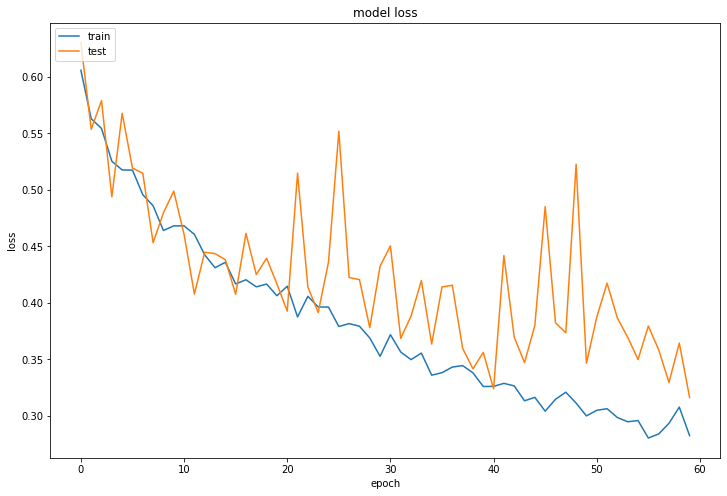

In [14]:
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


 Classification report 
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1000
           1       0.51      0.51      0.51      1000

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



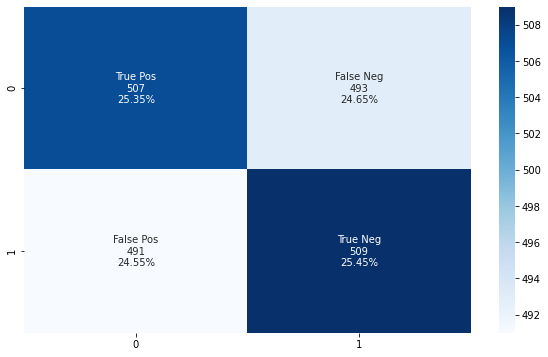

In [15]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# test_set.classes

preds = classifier.predict(test_set)
cm = confusion_matrix(test_set.classes, np.round(preds))
#print(cm)

# y_pred = np.argmax(Y_pred, axis=1)
# print('Confusion Matrix')
# cnf_matrix=confusion_matrix(test_set.classes, y_pred)

cnf_report=classification_report(test_set.classes, np.round(preds))
print(" Classification report ")
print(cnf_report)

group_names = ["True Pos","False Neg","False Pos","True Neg"]
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()

In [16]:
#single prediction
import numpy as np
import cv2
from keras.preprocessing import image

test_image=image.load_img('/content/Dataset/cats_dogs_dataset_224_by_224/test/cats/cat_0003.jpg',target_size=(224,224),color_mode='grayscale')

test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
test_image /=255

result=classifier.predict(test_image)
print(np.round(result))
print(np.argmax(result, axis=1))


test_image=image.load_img('/content/Dataset/cats_dogs_dataset_224_by_224/test/dogs/dog_1321.jpg',target_size=(224,224),color_mode='grayscale')

test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
test_image /=255

result=classifier.predict(test_image)
print(np.round(result))
print(np.argmax(result, axis=1))

[[0.]]
[0]
[[1.]]
[0]
